### 4 dimension for EDA
- 1. Composition
- 2. Distribution
- 3. comparison
- 4. Relationship

In [1]:
# import library
import pandas as pd


In [2]:
# load the dataset
df = pd.read_excel("../dataset/titanc.xlsx")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### composition

In [3]:
df.shape
# print the number of rows and columns using f string
print(f"No. of Rows: {df.shape[0]}\nNo. of Columns: {df.shape[1]}")

No. of Rows: 891
No. of Columns: 15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [5]:
df.dtypes
# print only the boolean columns
print(f"Boolean Columns: {df.select_dtypes(include='bool').columns.tolist()}")

Boolean Columns: ['adult_male', 'alone']


In [6]:
df.head()
df['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [7]:
# total numbers of row
len(df)

891

In [8]:
# find value counts percentage for sex column
# df["sex"].value_counts(normalize=True) * 100
df["sex"].value_counts()/ len(df) * 100
# round  the percentage to 2 decimal places
round(df['sex'].value_counts()/ len(df) * 100, 2)

sex
male      64.76
female    35.24
Name: count, dtype: float64

In [11]:
class_counts = round(df['class'].value_counts()/ len(df) * 100, 2)
# sort the values in ascending order
class_counts.sort_values(ascending=True)

class
Second    20.65
First     24.24
Third     55.11
Name: count, dtype: float64

In [13]:
# Find the value counts in percentage for the 'class' where sex == female
df_female = df[df["sex"]=="female"]
df_female["class"].value_counts(normalize=True) * 100

class
Third     45.859873
First     29.936306
Second    24.203822
Name: proportion, dtype: float64

In [14]:
# group by class and find the percentage of each class for sex column
df.groupby(["sex"]).value_counts() / len(df) * 100

sex     survived  pclass  age   sibsp  parch  fare      embarked  class   who    adult_male  deck  embark_town  alive  alone
female  1         1       24.0  0      0      69.3000   C         First   woman  False       B     Cherbourg    yes    True     0.224467
        0         1       2.0   1      2      151.5500  S         First   child  False       C     Southampton  no     False    0.112233
                          25.0  1      2      151.5500  S         First   woman  False       C     Southampton  no     False    0.112233
                          50.0  0      0      28.7125   C         First   woman  False       C     Cherbourg    no     True     0.112233
                  2       57.0  0      0      10.5000   S         Second  woman  False       E     Southampton  no     True     0.112233
                                                                                                                                  ...   
male    1         2       2.0   1      1      26.0000

In [15]:
round(df.groupby(["sex", "class"]).size() / len(df) * 100, 2).sort_values(ascending=True)


sex     class 
female  Second     8.53
        First     10.55
male    Second    12.12
        First     13.69
female  Third     16.16
male    Third     38.95
dtype: float64

In [21]:
round(df.groupby(["sex", "class","embarked", "fare"]).size() / len(df) * 100, 2)

sex     class  embarked  fare   
female  First  C         27.7208    0.11
                         28.7125    0.11
                         31.0000    0.11
                         39.6000    0.11
                         49.5000    0.11
                                    ... 
male    Third  S         34.3750    0.11
                         39.6875    0.56
                         46.9000    0.45
                         56.4958    0.79
                         69.5500    0.45
Length: 370, dtype: float64

### Distribution

In [22]:
df['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [23]:
df['sex'].describe()

count      891
unique       2
top       male
freq       577
Name: sex, dtype: object

<Axes: ylabel='Frequency'>

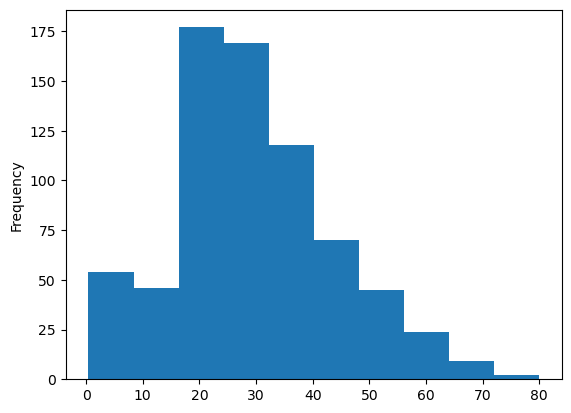

In [ ]:
df['age'].plot(kind="hist")  # only for numeric columns

<Axes: ylabel='Frequency'>

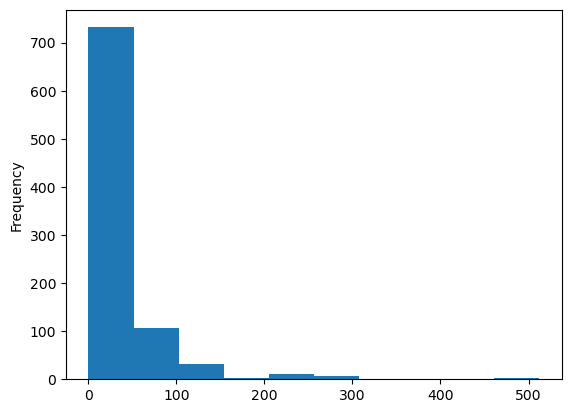

In [25]:
df['fare'].plot(kind="hist") 

In [27]:
df['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

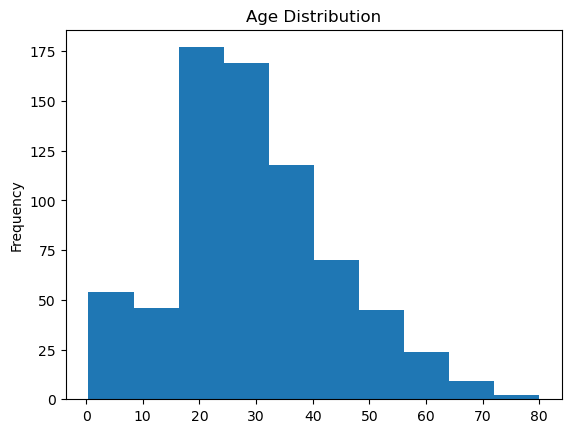

In [26]:
# age distribution
age_distribution = df['age'].plot(kind="hist", title="Age Distribution")

In [28]:
df['age'].skew()

np.float64(0.38910778230082704)

In [29]:
df['fare'].skew()

np.float64(4.787316519674893)

### Comparison

In [31]:
df.groupby("who")['survived'].mean()

who
child    0.590361
man      0.163873
woman    0.756458
Name: survived, dtype: float64

In [ ]:
df.groupby(["sex", "who", "class"])['survived'].mean()*100

sex     who    class 
female  child  First      66.666667
               Second    100.000000
               Third      53.333333
        woman  First      97.802198
               Second     90.909091
               Third      49.122807
male    child  First     100.000000
               Second    100.000000
               Third      32.142857
        man    First      35.294118
               Second      8.080808
               Third      11.912226
Name: survived, dtype: float64

<Axes: title={'center': 'Survival Rate plot'}, xlabel='who'>

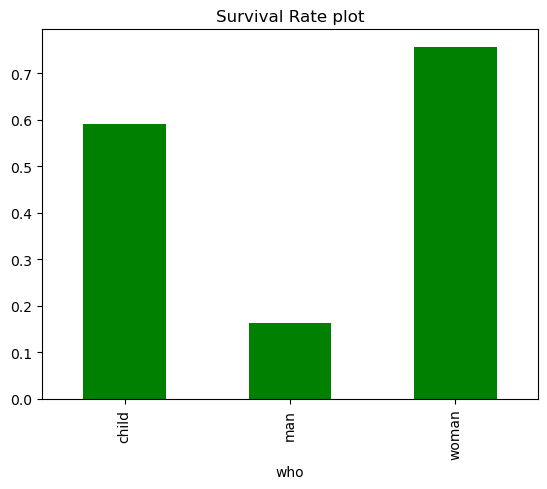

In [40]:
df.groupby([ "who"])['survived'].mean().plot(kind="bar", title="Survival Rate plot", color='green')

#### Relationship

           age      fare
age   1.000000  0.096067
fare  0.096067  1.000000


<Axes: >

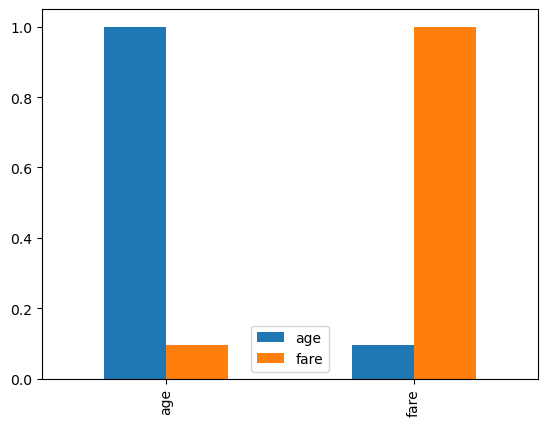

In [46]:
print(df[['age','fare']].corr())
df[['age','fare']].corr().plot(kind='bar')

<Axes: title={'center': 'Age vs Fare'}, xlabel='age', ylabel='fare'>

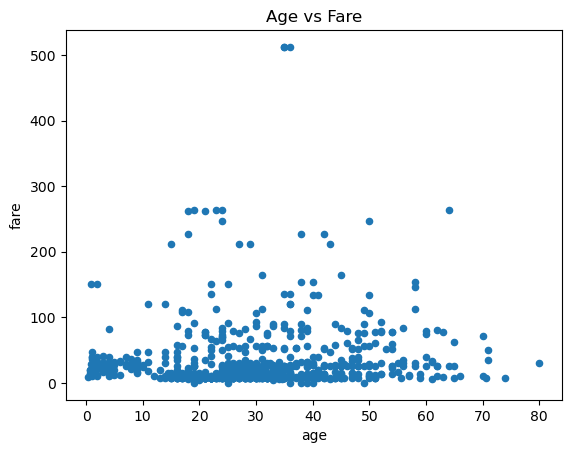

In [43]:
# create a correlation mattrix only on int an float data from df
df.plot(kind="scatter", x="age", y="fare", title="Age vs Fare")

In [45]:
df.groupby('survived')[['age','fare']].mean()

,age,fare
survived,,
0,30.626179,22.117887
1,28.343690,48.395408
